# **The Significance of Lung Segmentation in Chest X-rays**

Lung segmentation in chest X-rays is a crucial task in medical image analysis. It involves identifying and delineating the boundaries of the lungs within an X-ray image. This segmentation serves as a foundation for various diagnostic applications, especially in detecting and diagnosing respiratory diseases such as pneumonia and tuberculosis.
*   **Disease Detection**: By accurately segmenting the lungs, medical professionals can more effectively identify abnormalities, such as opacities or infiltrates, that may indicate the presence of pneumonia or tuberculosis.

*   **Quantifying Disease Severity**: Lung segmentation allows for the measurement of the extent of disease involvement, aiding in assessing the severity of conditions like pneumonia and guiding treatment decisions.
*   **Monitoring Treatment Progress**: By comparing segmented lung images over time, doctors can monitor the effectiveness of treatments and assess patient response.



# **The U-Net Architecture: A Powerful Tool for Lung Segmentation**
The U-Net architecture, originally proposed for medical image segmentation, has become a popular choice due to its exceptional performance in tasks involving dense pixel-wise predictions. Its encoder-decoder structure is particularly well-suited for segmentation problems, allowing it to capture both global and local context within an image.
*   **Encoder**: The encoder part of the U-Net consists of a series of convolutional layers with decreasing spatial dimensions. These layers extract progressively higher-level features from the input image, capturing global context.
*   **Decoder**: The decoder part of the U-Net upsamples the features from the encoder, gradually increasing the spatial dimensions. Skip connections between the encoder and decoder layers help preserve fine-grained details, ensuring accurate localization of the lung boundaries.
*   **Output**: The final layer of the U-Net typically produces a segmentation map, where each pixel represents a predicted class (e.g., lung or background).
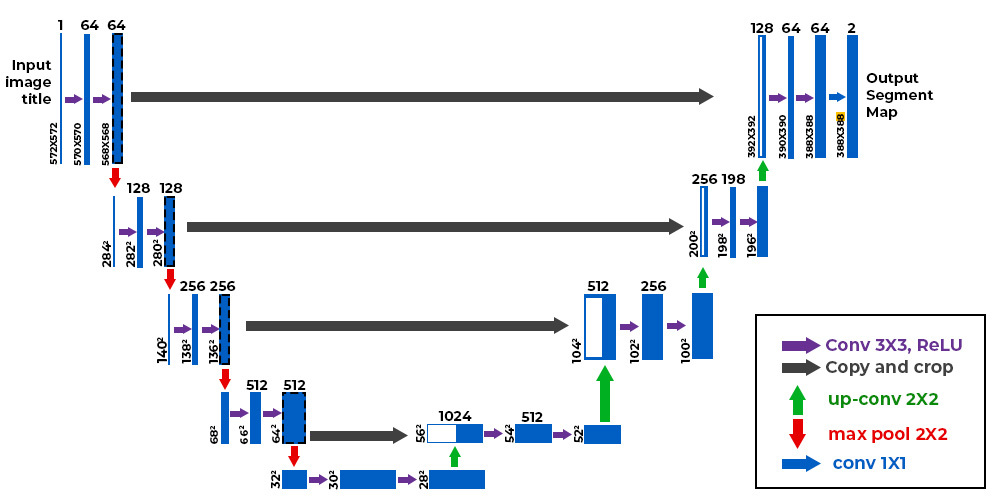
Overall, the U-Net's ability to learn complex patterns and capture both global and local information makes it a powerful tool for lung segmentation in chest X-rays, facilitating accurate diagnosis and treatment of respiratory diseases.

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nikhilpandey360/chest-xray-masks-and-labels

Dataset URL: https://www.kaggle.com/datasets/nikhilpandey360/chest-xray-masks-and-labels
License(s): CC0-1.0
100% 9.56G/9.58G [01:56<00:00, 96.7MB/s]
100% 9.58G/9.58G [01:56<00:00, 88.4MB/s]


In [ ]:
!unzip chest-xray-masks-and-labels.zip

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model


# **Making UNET Model**

In [ ]:
def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024)

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="U-Net")
    return model

if __name__ == "__main__":
    input_shape = (512, 512, 3)
    model = build_unet(input_shape)
    model.summary()

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 512, 512, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 512, 512, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 512, 512, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 512, 512, 64)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 512, 512, 64)   │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 512, 512, 64)   │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 512, 512, 64)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 256, 256, 64)   │              0 │ activation_1[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 256, 256, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 256, 256, 128)  │            512 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 256, 256, 128)  │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 256, 256, 128)  │        147,584 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 256, 256, 128)  │            512 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 256, 256, 128)  │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 128, 128, 128)  │              0 │ activation_3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 128, 128, 256)  │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4

 Total params: 31,055,297 (118.47 MB)

 Trainable params: 31,043,521 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

# **Making Metrics**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K

def iou(y_true, y_pred):
    intersection = K.sum(y_true * y_pred)
    union = K.sum(y_true) + K.sum(y_pred) - intersection
    return (intersection + 1e-15) / (union + 1e-15)

smooth = 1e-15
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

# **Training**

In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import numpy as np
import cv2
from glob import glob
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision

""" Global parameters """
H = 512
W = 512

def create_dir(path):
    """ Create a directory. """
    if not os.path.exists(path):
        os.makedirs(path)

def load_data(path, split=0.1):
    images = sorted(glob(os.path.join(path, "CXR_png", "*.png")))
    masks = sorted(glob(os.path.join(path, "masks", "*.png")))

    # Ensure both lists have the same length
    min_len = min(len(images), len(masks))
    images = images[:min_len]
    masks = masks[:min_len]

    split_size = int(len(images) * split)

    train_x, valid_x = train_test_split(images, test_size=split_size, random_state=42)
    train_y, valid_y = train_test_split(masks, test_size=split_size, random_state=42)

    train_x, test_x = train_test_split(train_x, test_size=split_size, random_state=42)
    train_y, test_y = train_test_split(train_y, test_size=split_size, random_state=42)

    return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)

def read_image(path):
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    x = cv2.resize(x, (W, H))
    x = x/255.0
    x = x.astype(np.float32)
    return x

def read_mask(path1):
    x1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
    x = x1
    x = cv2.resize(x, (W, H))
    x = x/np.max(x)
    x = x > 0.5
    x = x.astype(np.float32)
    x = np.expand_dims(x, axis=-1)
    return x

def tf_parse(x, y1):
    def _parse(x, y1):
        x = x.decode()
        y1 = y1.decode()

        x = read_image(x)
        y = read_mask(y1)
        return x, y

    x, y = tf.numpy_function(_parse, [x, y1], [tf.float32, tf.float32])
    x.set_shape([H, W, 3])
    y.set_shape([H, W, 1])
    return x, y

def tf_dataset(X, Y1, batch=8):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y1))
    dataset = dataset.shuffle(buffer_size=200)
    dataset = dataset.map(tf_parse)
    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(4)
    return dataset

if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    create_dir("files")


    """ Hyperparameters """
    batch_size = 2
    lr = 1e-5
    num_epochs = 10
    model_path = os.path.join("files", "model.h5")
    csv_path = os.path.join("files", "data.csv")

    """ Dataset """
    dataset_path = "/content/Lung Segmentation"

    (train_x, train_y), (valid_x, valid_y), (test_x, test_y) = load_data(dataset_path)

    print(f"Train: {len(train_x)} - {len(train_y)}")
    print(f"Valid: {len(valid_x)} - {len(valid_y)}")
    print(f"Test: {len(test_x)} - {len(test_y)}")

    train_dataset = tf_dataset(train_x, train_y ,batch=batch_size)
    valid_dataset = tf_dataset(valid_x, valid_y, batch=batch_size)

    model = build_unet((H, W, 3))
    metrics = [dice_coef, iou, Recall(), Precision()]
    model.compile(loss=dice_loss, optimizer=Adam(lr), metrics=metrics)

    callbacks = [
    ModelCheckpoint(model_path + ".keras", verbose=1, save_best_only=True), # add '.keras' to the filepath
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1),
    CSVLogger(csv_path)
    ]

    model.fit(
        train_dataset,
        epochs=num_epochs,
        validation_data=valid_dataset,
        callbacks=callbacks
    )


Train: 564 - 564
Valid: 70 - 70
Test: 70 - 70
Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - dice_coef: 0.5127 - iou: 0.3517 - loss: 0.4873 - precision_3: 0.4547 - recall_3: 0.7772
Epoch 1: val_loss improved from inf to 0.53843, saving model to files/model.h5.keras
282/282 ━━━━━━━━━━━━━━━━━━━━ 219s 562ms/step - dice_coef: 0.5130 - iou: 0.3520 - loss: 0.4870 - precision_3: 0.4550 - recall_3: 0.7774 - val_dice_coef: 0.4616 - val_iou: 0.3016 - val_loss: 0.5384 - val_precision_3: 0.3090 - val_recall_3: 0.9692 - learning_rate: 1.0000e-05
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - dice_coef: 0.7118 - iou: 0.5557 - loss: 0.2882 - precision_3: 0.6849 - recall_3: 0.8430
Epoch 2: val_loss improved from 0.53843 to 0.30028, saving model to files/model.h5.keras
282/282 ━━━━━━━━━━━━━━━━━━━━ 212s 556ms/step - dice_coef: 0.7119 - iou: 0.5557 - loss: 0.2881 - precision_3: 0.6849 - recall_3: 0.8430 - val_dice_coef: 0.6997 - val_iou: 0.5415 - val_loss: 0.3003 - val_precision_3: 0.63

# **Testing**

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing image: CHNCXR_0304_0.png
Original shape: (512, 512, 3), Predicted mask shape: (512, 512, 1)
Prediction summary (non-zero pixels): 71440


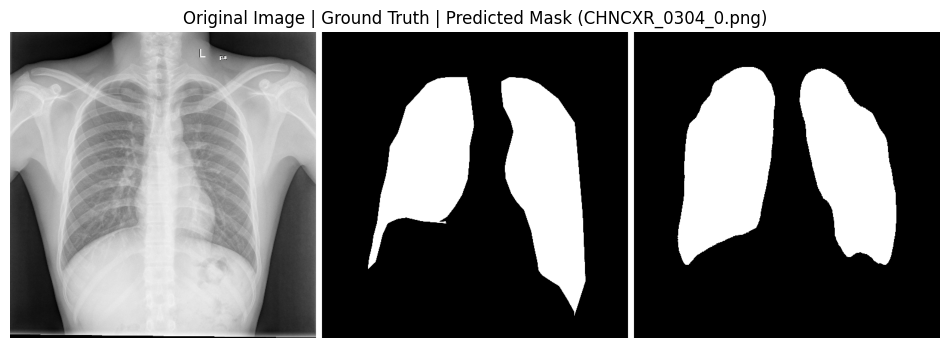

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing image: CHNCXR_0125_0.png
Original shape: (512, 512, 3), Predicted mask shape: (512, 512, 1)
Prediction summary (non-zero pixels): 82545


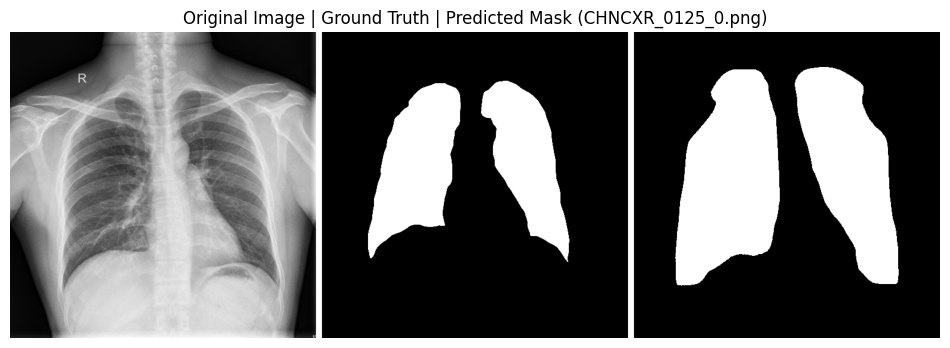

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image: CHNCXR_0350_1.png
Original shape: (512, 512, 3), Predicted mask shape: (512, 512, 1)
Prediction summary (non-zero pixels): 81138


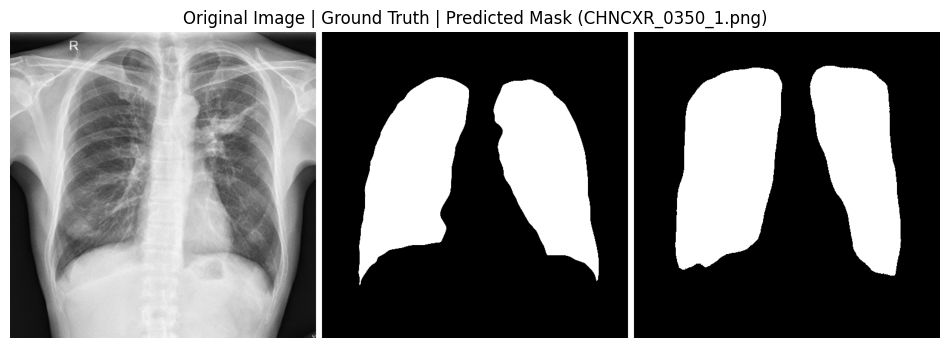

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image: CHNCXR_0605_1.png
Original shape: (512, 512, 3), Predicted mask shape: (512, 512, 1)
Prediction summary (non-zero pixels): 78047


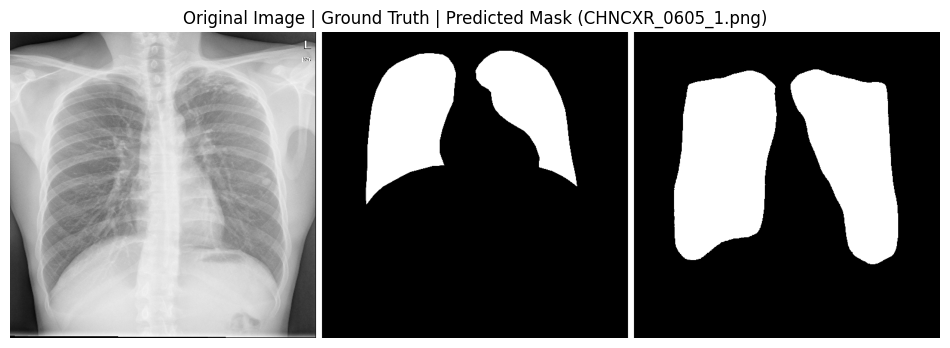

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image: CHNCXR_0041_0.png
Original shape: (512, 512, 3), Predicted mask shape: (512, 512, 1)
Prediction summary (non-zero pixels): 87803


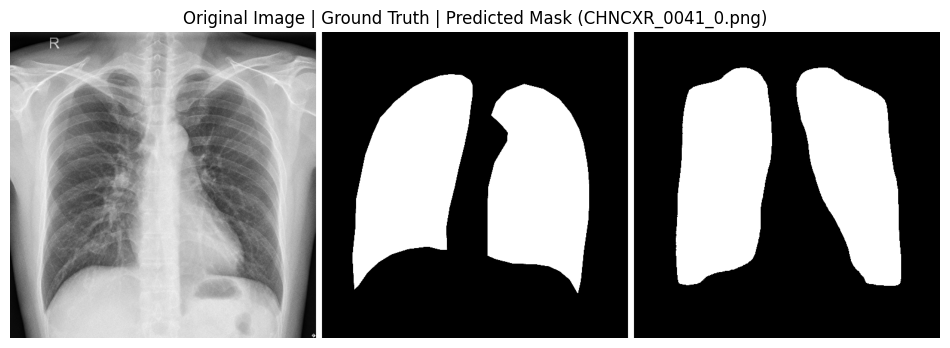

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image: CHNCXR_0128_0.png
Original shape: (512, 512, 3), Predicted mask shape: (512, 512, 1)
Prediction summary (non-zero pixels): 83820


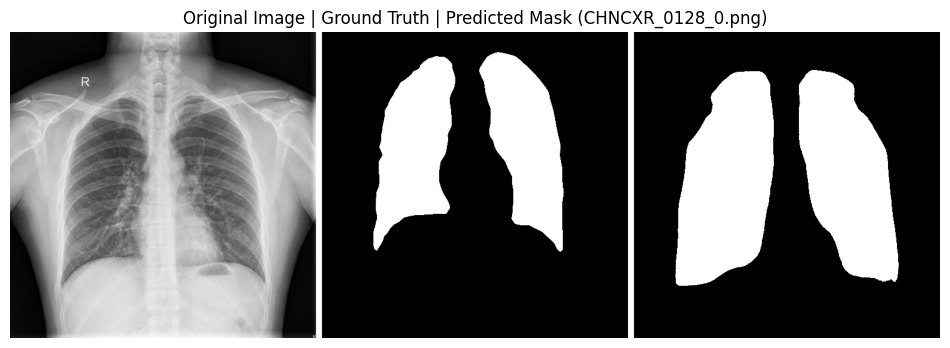

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image: CHNCXR_0485_1.png
Original shape: (512, 512, 3), Predicted mask shape: (512, 512, 1)
Prediction summary (non-zero pixels): 82633


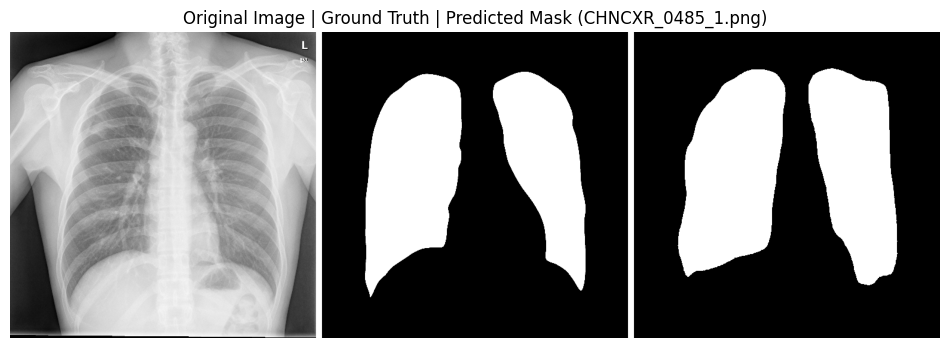

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing image: CHNCXR_0150_0.png
Original shape: (512, 512, 3), Predicted mask shape: (512, 512, 1)
Prediction summary (non-zero pixels): 74428


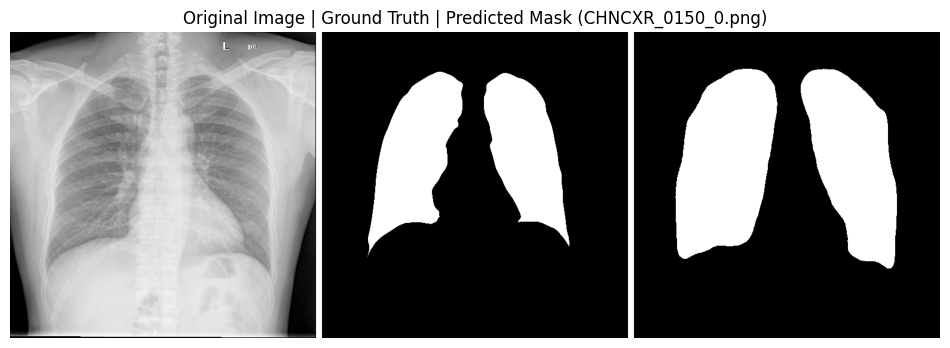

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image: CHNCXR_0040_0.png
Original shape: (512, 512, 3), Predicted mask shape: (512, 512, 1)
Prediction summary (non-zero pixels): 60967


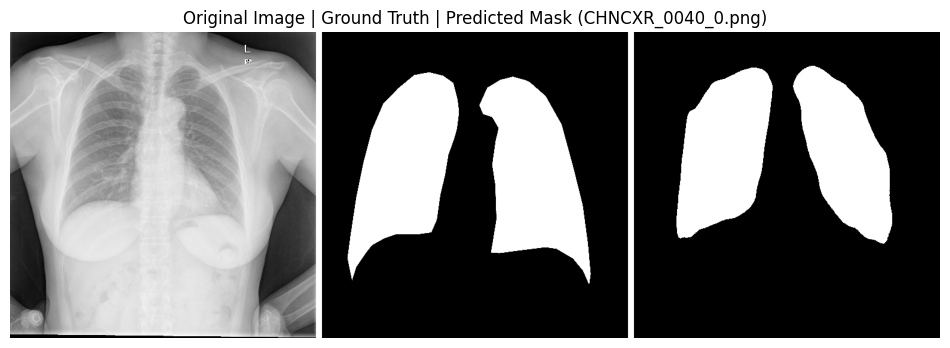

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image: CHNCXR_0290_0.png
Original shape: (512, 512, 3), Predicted mask shape: (512, 512, 1)
Prediction summary (non-zero pixels): 77843


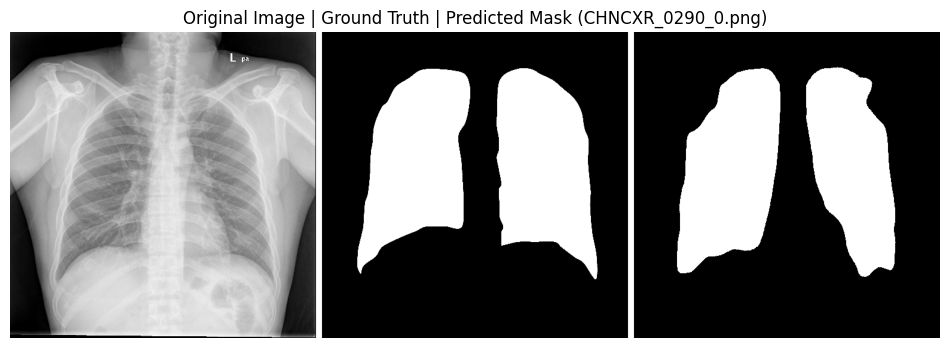

Prediction completed. Displayed 10 images.


In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import numpy as np
import cv2
from glob import glob
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
import matplotlib.pyplot as plt  # Import matplotlib for displaying images

H = 512
W = 512

def display_images(ori_x, ori_y, y_pred, image_name):
    """ Utility function to display the images using matplotlib. """
    sep_line = np.ones((H, 10, 3)) * 255
    y_pred_img = np.concatenate([y_pred, y_pred, y_pred], axis=-1) * 255

    cat_image = np.concatenate([ori_x, sep_line, ori_y, sep_line, y_pred_img], axis=1)

    plt.figure(figsize=(12, 8))
    plt.imshow(cat_image.astype(np.uint8))
    plt.title(f"Original Image | Ground Truth | Predicted Mask ({image_name})")
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Loading model """
    with CustomObjectScope({'iou': iou, 'dice_coef': dice_coef, 'dice_loss': dice_loss}):
        model = tf.keras.models.load_model("files/model.h5.keras")

    """ Dataset """
    dataset_path = "/content/Lung Segmentation"
    (train_x, train_y), (valid_x, valid_y), (test_x, test_y) = load_data(dataset_path)

    """ Predicting the mask """
    display_count = 0  # Counter to limit displayed images

    for x, y1 in zip(test_x, test_y):  # Regular loop, no tqdm
        if display_count >= 10:  # Display only 10 images
            break

        """ Extracting the image name. """
        image_name = x.split("/")[-1]

        """ Reading the image """
        ori_x = cv2.imread(x, cv2.IMREAD_COLOR)
        ori_x = cv2.resize(ori_x, (W, H))
        x = ori_x / 255.0
        x = x.astype(np.float32)
        x = np.expand_dims(x, axis=0)

        """ Reading the mask """
        ori_y1 = cv2.imread(y1, cv2.IMREAD_GRAYSCALE)
        ori_y = cv2.resize(ori_y1, (W, H))
        ori_y = np.expand_dims(ori_y, axis=-1)  ## (512, 512, 1)
        ori_y = np.concatenate([ori_y, ori_y, ori_y], axis=-1)  ## (512, 512, 3)

        """ Predicting the mask. """
        y_pred = model.predict(x)[0] > 0.5
        y_pred = y_pred.astype(np.int32)

        """ Print the image name and prediction details """
        print(f"Processing image: {image_name}")
        print(f"Original shape: {ori_x.shape}, Predicted mask shape: {y_pred.shape}")
        print(f"Prediction summary (non-zero pixels): {np.sum(y_pred)}")

        """ Display the original image, ground truth, and predicted mask """
        display_images(ori_x, ori_y, y_pred, image_name)

        display_count += 1  # Increment the counter after each displayed image

    print("Prediction completed. Displayed 10 images.")


The U-Net model used for lung segmentation achieved a precision of 73%, which indicates it can segment lung regions reasonably well but leaves room for improvement. One of the key challenges is the complexity of lung boundaries, as lungs often have irregular shapes and may be partially obscured by other structures like the heart or diaphragm. This makes accurate segmentation difficult. Another challenge is the potential for class imbalance in the dataset, where the background pixels dominate, leading to under-segmentation of the lung regions. Additionally, poor-quality or inconsistent image annotations could further reduce the model’s precision. Overfitting may also occur if the training dataset is small or lacks diversity, limiting the model's ability to generalize to new data.

To improve performance, several strategies can be implemented. Increasing the amount and diversity of data augmentation can help the model become more robust to variations in lung images. Utilizing segmentation-specific loss functions, such as the Dice loss or Intersection over Union (IoU), could improve the model’s pixel-wise accuracy. Post-processing techniques like conditional random fields (CRFs) or morphological operations can also help refine the segmented regions and reduce noise. Increasing the depth or capacity of the U-Net could help the model learn more complex features, improving segmentation performance. Finally, using an ensemble of different models or improving the consistency of data labeling could further enhance the model's precision.